# Candy Power Ranking
This is my submission for the take home challenge regarding my application as Junior Data Scientist Advanced Analytics.
The goal is to give a recommendation for a new candy brand. 
Specifially finding relevant features which have a positive influence on customers perception about a certain candy product.
For this the "Ultimate Halloween Candy Power Ranking" dataset is used.
It contains various brands and their respective features, while giving an intuition about their popularity recorded by matchups.

First we have to import all basic packages for data analysis. 
More specified frameworks will probably be imported later when needed.

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('mode.chained_assignment', None)

read data, given in variable path_data.

In [34]:
path_data = "data/candy-data.csv"
data = pd.read_csv(path_data)   

In [35]:
print data.shape
print data.head()
data.dtypes

(85, 13)
  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465  


competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object

Rows contain candy brands (85), while columns denote features (0:-1).  
Categorical features (int) are binary according to documentation while sugar and price is given in percentile (float).  
Last column shows the win percentage (target variable?) of the corresponding candy brand based on around ~269.000 matchups.  
PROBLEM!: not clear how often one brand was picked for a matchup

In [36]:
data.info()
##check if categorical variables are truly binary
for col in data.columns[1:-3]:
    print pd.unique(data[col])

##check    
for col in data.columns[-3:-1]:
    if any(data[col] < 0) or any(data[col] > 1):
        print col + "contains illegal values"

for col in data.columns[-1:]:
    if any(data[col] < 0) or any(data[col] > 100):
        print col + "contains illegal values"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.7+ KB
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]


Inspection of data.   
no outlier/errors in dataset.   
No missing/null values. 
-> clean data.

In [37]:
data.describe()


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [38]:
sum(data["pluribus"]) / 85.0

0.5176470588235295

More than half of the different candy brands were given out in some kind of box (check 50% quantile of pluribus) though the difference is small (51.76% given in a box).  
The majority of the samples fall below the lower percentile regarding the other features meaning that there wasn't a feature which occured too often.  
Next we will investigage the characteristics of this dataset with some visualisations.

Feature chocolate: 60.92 (1) and 42.14 (0)
Feature fruity: 44.12 (1) and 55.33 (0)
Feature caramel: 57.35 (1) and 48.93 (0)
Feature peanutyalmondy: 63.70 (1) and 47.68 (0)
Feature nougat: 60.05 (1) and 49.44 (0)
Feature crispedricewafer: 66.17 (1) and 48.89 (0)
Feature hard: 40.51 (1) and 52.42 (0)
Feature bar: 61.30 (1) and 46.71 (0)
Feature pluribus: 46.82 (1) and 54.07 (0)


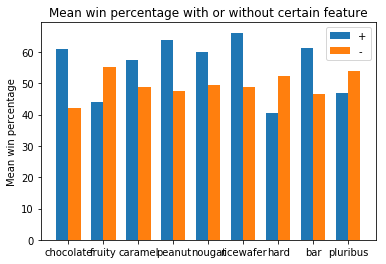

In [39]:
win_yes = []
win_no = []
for col in data.columns[1:-3]:
    feature_yes = data[data[col] == 1]
    feature_no = data[data[col] == 0]
    win_feature = np.mean(feature_yes["winpercent"]) 
    win_feature_no = np.mean(feature_no["winpercent"])
    win_yes.append(win_feature)
    win_no.append(win_feature_no)
    print "Feature {}: {:.2f} (1) and {:.2f} (0)".format(col, win_feature, win_feature_no)

## do for 9 binary features


x = np.arange(len(data.columns[1:-3]))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(x - width/2, win_yes, width, label='+')
ax.bar(x + width/2, win_no, width, label='-')


ax.set_ylabel('Mean win percentage')
ax.set_title('Mean win percentage with or without certain feature')
ax.set_xticks(x)

#ax.set_xticklabels(x+1)
ax.set_xticklabels(['chocolate', 'fruity', 'caramel',
       'peanut', 'nougat', 'ricewafer', 'hard', 'bar',
       'pluribus'])
ax.legend()


plt.show()

##First naive analysis
For this approach we compared the mean win percentages for candies where a specific feature was true and where it doesn't apply.  
Upon first look candies containing chocolate, some kind of nut, ricewafer or served in some kind of bar form seem to have a higher positive probability on being picked.   
While features like fruity, hard or being in a box appear to have a negative influence on the win percentage.  
Please note that this simple approach should only serve as an intuition, as no latent information between features is modeled.


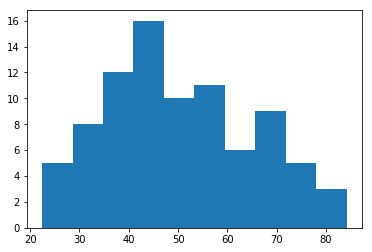

In [40]:
plt.hist(data["winpercent"])
plt.show()

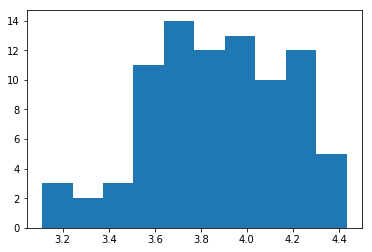

In [41]:
plt.hist(np.log(data["winpercent"]))
plt.show()

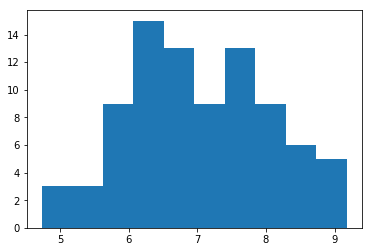

In [42]:
plt.hist(np.sqrt(data["winpercent"]))
plt.show()

##Key Driver Analysis (KDA)
Task is a classic case of Key Driver Analysis (KDA).  
Output (winpercent) is continous, as such we use a regression approach.  
Assumption of normal distribution for output variable is partly correct.  

                  chocolate    fruity   caramel  peanutyalmondy    nougat  \
chocolate          1.000000 -0.741721  0.249875        0.377824  0.254892   
fruity            -0.741721  1.000000 -0.335485       -0.399280 -0.269367   
caramel            0.249875 -0.335485  1.000000        0.059356  0.328493   
peanutyalmondy     0.377824 -0.399280  0.059356        1.000000  0.213113   
nougat             0.254892 -0.269367  0.328493        0.213113  1.000000   
crispedricewafer   0.341210 -0.269367  0.213113       -0.017646 -0.089744   
hard              -0.344177  0.390678 -0.122355       -0.205557 -0.138675   
bar                0.597421 -0.515066  0.333960        0.260420  0.522976   
pluribus          -0.339675  0.299725 -0.269585       -0.206109 -0.310339   
sugarpercent       0.104169 -0.034393  0.221933        0.087889  0.123081   
pricepercent       0.504675 -0.430969  0.254327        0.309153  0.153196   

                  crispedricewafer      hard       bar  pluribus  \
chocola

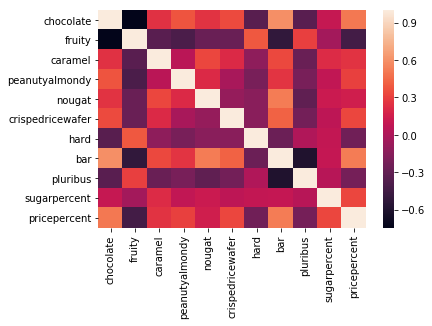

In [43]:
features = data.columns[1:-1]
x = data[features]
y = data["winpercent"]
corr = x.corr()
print corr
sns.heatmap(corr,
            xticklabels=corr.columns.values)
plt.show()
#plot correlations

Some mild correlation can be observed between features.  
Especially chocolate and fruity are strongly negativeley correlated.   
Keep in mind for further evalation.

In [44]:
import statsmodels.api as sm
###statsmodell regression model doesn't use a bias term in its default configuration
# we use a simple linear regression model, weights tell us about importance of features.
#x = (x-x.mean())/x.std()
x.loc[:, "bias"] = 1.0
model = sm.OLS(y, x)
model = model.fit()


model.summary()



<table class="simpletable">
<caption>OLS Regression Results</caption>
<tr>
  <th>Dep. Variable:</th>       <td>winpercent</td>    <th>  R-squared:         </th> <td>   0.540</td>
</tr>
<tr>
  <th>Model:</th>                   <td>OLS</td>       <th>  Adj. R-squared:    </th> <td>   0.471</td>
</tr>
<tr>
  <th>Method:</th>             <td>Least Squares</td>  <th>  F-statistic:       </th> <td>   7.797</td>
</tr>
<tr>
  <th>Date:</th>             <td>Sun, 25 Aug 2019</td> <th>  Prob (F-statistic):</th> <td>9.50e-09</td>
</tr>
<tr>
  <th>Time:</th>                 <td>10:36:16</td>     <th>  Log-Likelihood:    </th> <td> -315.64</td>
</tr>
<tr>
  <th>No. Observations:</th>      <td>    85</td>      <th>  AIC:               </th> <td>   655.3</td>
</tr>
<tr>
  <th>Df Residuals:</th>          <td>    73</td>      <th>  BIC:               </th> <td>   684.6</td>
</tr>
<tr>
  <th>Df Model:</th>              <td>    11</td>      <th>                     </th>     <td> </td>   
</tr>
<tr>
  <th>Covariance Type:</th>      <td>nonrobust</td>    <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
          <td></td>            <th>coef</th>     <th>std err</th>      <th>t</th>      <th>P>|t|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>chocolate</th>        <td>   19.7481</td> <td>    3.899</td> <td>    5.065</td> <td> 0.000</td> <td>   11.978</td> <td>   27.518</td>
</tr>
<tr>
  <th>fruity</th>           <td>    9.4223</td> <td>    3.763</td> <td>    2.504</td> <td> 0.015</td> <td>    1.923</td> <td>   16.922</td>
</tr>
<tr>
  <th>caramel</th>          <td>    2.2245</td> <td>    3.657</td> <td>    0.608</td> <td> 0.545</td> <td>   -5.065</td> <td>    9.514</td>
</tr>
<tr>
  <th>peanutyalmondy</th>   <td>   10.0707</td> <td>    3.616</td> <td>    2.785</td> <td> 0.007</td> <td>    2.864</td> <td>   17.277</td>
</tr>
<tr>
  <th>nougat</th>           <td>    0.8043</td> <td>    5.716</td> <td>    0.141</td> <td> 0.888</td> <td>  -10.588</td> <td>   12.197</td>
</tr>
<tr>
  <th>crispedricewafer</th> <td>    8.9190</td> <td>    5.268</td> <td>    1.693</td> <td> 0.095</td> <td>   -1.580</td> <td>   19.418</td>
</tr>
<tr>
  <th>hard</th>             <td>   -6.1653</td> <td>    3.455</td> <td>   -1.784</td> <td> 0.079</td> <td>  -13.051</td> <td>    0.721</td>
</tr>
<tr>
  <th>bar</th>              <td>    0.4415</td> <td>    5.061</td> <td>    0.087</td> <td> 0.931</td> <td>   -9.645</td> <td>   10.528</td>
</tr>
<tr>
  <th>pluribus</th>         <td>   -0.8545</td> <td>    3.040</td> <td>   -0.281</td> <td> 0.779</td> <td>   -6.913</td> <td>    5.204</td>
</tr>
<tr>
  <th>sugarpercent</th>     <td>    9.0868</td> <td>    4.659</td> <td>    1.950</td> <td> 0.055</td> <td>   -0.200</td> <td>   18.373</td>
</tr>
<tr>
  <th>pricepercent</th>     <td>   -5.9284</td> <td>    5.513</td> <td>   -1.075</td> <td> 0.286</td> <td>  -16.916</td> <td>    5.060</td>
</tr>
<tr>
  <th>bias</th>             <td>   34.5340</td> <td>    4.320</td> <td>    7.994</td> <td> 0.000</td> <td>   25.924</td> <td>   43.144</td>
</tr>
</table>
<table class="simpletable">
<tr>
  <th>Omnibus:</th>       <td> 1.025</td> <th>  Durbin-Watson:     </th> <td>   1.728</td>
</tr>
<tr>
  <th>Prob(Omnibus):</th> <td> 0.599</td> <th>  Jarque-Bera (JB):  </th> <td>   1.000</td>
</tr>
<tr>
  <th>Skew:</th>          <td>-0.104</td> <th>  Prob(JB):          </th> <td>   0.606</td>
</tr>
<tr>
  <th>Kurtosis:</th>      <td> 2.511</td> <th>  Cond. No.          </th> <td>    10.0</td>
</tr>
</table><br/><br/>Warnings:<br/>[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

Initial Findings:  
In the following we look at the statistically significant features where P > |t| with alpha = 0.05.  
These are chocolate, fruity, peanutalmondy.  
As these are binary, the presence of these feature means that the win percentage rises (~19 %, ~9%, ~10%) respectively.  
Key Driver currently are chocolate and peanutalmondy.


For some reason fruity has a high positive weight, meaning a positive correlation with our target variable according to our model.   
In contrast the plots done earlier implied a negative relation as the win percentage was worse in candies with a fruity taste.  

The correlation analysis showed strong correlation between fruity and chocolate -> possible Multi Colinearity? 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
print vif

    VIF Factor          features
0     2.772487         chocolate
1     2.597341            fruity
2     1.365539           caramel
3     1.334713    peanutyalmondy
4     1.832413            nougat
5     1.556129  crispedricewafer
6     1.287368              hard
7     3.535596               bar
8     1.712379          pluribus
9     1.273037      sugarpercent
10    1.819847      pricepercent
11   13.847342              bias


In [46]:
# check determinant of covariance matrix
np.linalg.det(corr)

0.0212439437558292

Though the Variance Inflation Factor (VIF) doesn't really tell us that there is a too strong colinearity in our dataset, the determinant of the correlation matrix is close to zero, which implies that there is probably some kind of linear dependency in the dataset.   
-> try different regression model, e.g. Shapley Regression

With the current results I would give the recommendation for a candy which contains chocolate and is peanutalmondylike.
